In [ ]:
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn .neighbors import KNeighborsClassifier
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/winequality (1).csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Since we are prediciting wine quality, column 'qaulity' will be our targt variable and the other columns are our feature set

In [ ]:
#explore the distribution of the target variabel
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


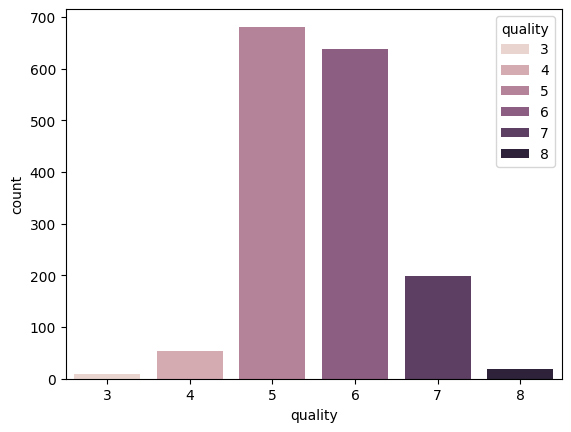

In [ ]:
#explore the distribution of the target variable
sns.countplot(data=df, x='quality', hue = 'quality')
plt.show()
# wines with a quality of 5 or 6 have the highest counts

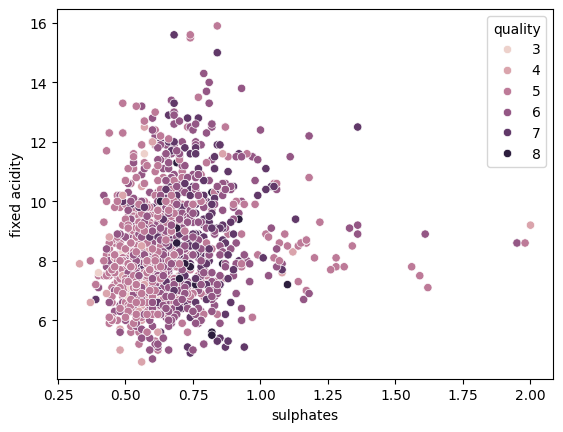

In [ ]:
#the relationship between sulphate and fixed acidity
sns.scatterplot(data=df, x='sulphates', y='fixed acidity', hue='quality')
plt.show()

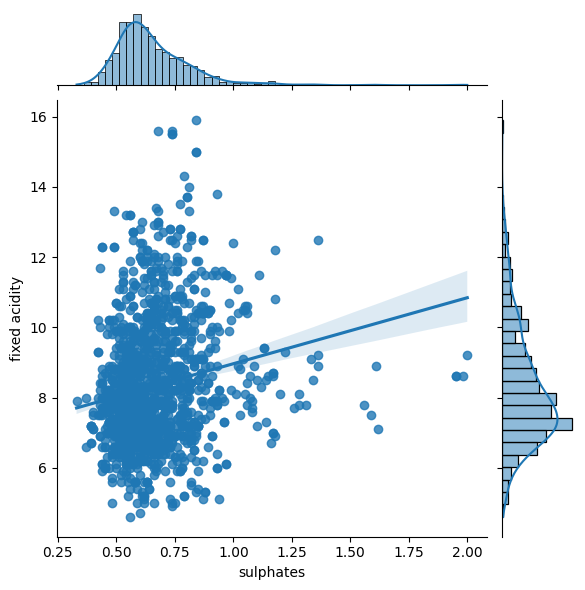

In [ ]:
#the relationship between sulphate and fixed acidity
sns.jointplot(data=df, x='sulphates', y='fixed acidity', kind='reg')
plt.show()

In [ ]:
df.shape

(1599, 12)

In [ ]:
len(df) * 0.8

1279.2

In [ ]:
#construct the training dataset for 80% of data
#traing set for model construction
train_x=df.iloc[0:1279,0:11]
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
train_y=df.iloc[0:1279,11]
train_y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
    #model construction
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)

KNeighborsClassifier()

In [ ]:
lafite = [[4, 0, 0, 2, 0.1, 2, 6, 1, 3.5, 0.7, 8]]

In [ ]:
prediction = model.predict(lafite)
print(prediction)

[4]


The KNN model that we built predicted the lafite data to have a wine quality of 4

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
min_max_sclaer=MinMaxScaler()

In [ ]:
#rescale features and test the model based on the rescaled features
rescaled_features=df
rescaled_features.head()
rescaled_features[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'
            ]]=min_max_sclaer.fit_transform(rescaled_features[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'
            ]]).round(2)
rescaled_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,5
1,0.28,0.52,0.00,0.12,0.14,0.34,0.22,0.49,0.36,0.21,0.22,5
2,0.28,0.44,0.04,0.10,0.13,0.20,0.17,0.51,0.41,0.19,0.22,5
3,0.58,0.11,0.56,0.07,0.11,0.23,0.19,0.58,0.33,0.15,0.22,6
4,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,5


In [ ]:
#construct the training dataset for 80% of data
#traing set for model construction
train_x_2=rescaled_features.iloc[0:1279,0:11]
train_x_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15
1,0.28,0.52,0.00,0.12,0.14,0.34,0.22,0.49,0.36,0.21,0.22
2,0.28,0.44,0.04,0.10,0.13,0.20,0.17,0.51,0.41,0.19,0.22
3,0.58,0.11,0.56,0.07,0.11,0.23,0.19,0.58,0.33,0.15,0.22
4,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15


In [ ]:
train_y_2=rescaled_features.iloc[0:1279,11]
train_y_2.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
    #model construction
model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(train_x_2, train_y_2)

KNeighborsClassifier()

In [ ]:
lafite = min_max_sclaer.fit_transform(lafite).round(2)
lafite

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
prediction_2 = model_2.predict(lafite)
print(prediction_2)

[5]
